In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from IPython import display
from matplotlib import colors
import time
%matplotlib inline

In [60]:
data = pd.read_csv('log_data.csv')
Frames = list(set(data["Frame"]))
x = data["X"]
y = data["Y"]
z = data["Z"]

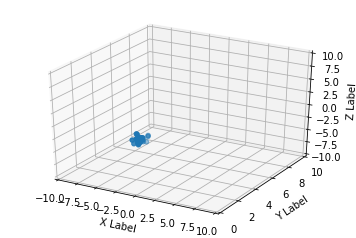

In [4]:
fig = plt.figure()
plt.ion()
for frame in Frames:
    plt.clf()
    ax = fig.add_subplot(111, projection="3d")
    ax.scatter(data[data.Frame == frame].X, data[data.Frame == frame].Y, data[data.Frame == frame].Z)
    ax.set_xlabel("X Label")
    ax.set_ylabel("Y Label")
    ax.set_zlabel("Z Label")
    ax.set_xlim(-10, 10)
    ax.set_ylim(0, 10)
    ax.set_zlim(-10, 10)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    time.sleep(1.0)
plt.ioff()

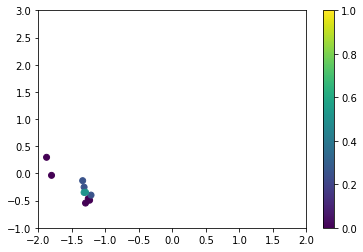

In [ ]:
fig = plt.figure()
plt.ion()
for frame in Frames:
    plt.clf()
    ax = fig.add_subplot(111)
    norm = colors.Normalize(vmin=0, vmax=1.0)
    plt.xlim(right=2, left=-2)
    plt.ylim(top=3, bottom=-1)
    plt.scatter(data[data.Frame == frame].X, data[data.Frame == frame].Z, c = data[data.Frame == frame].Doppler, norm=norm)
    plt.colorbar()
    display.display(plt.gcf())
    display.clear_output(wait=True)
    time.sleep(0.0005)
plt.ioff()

In [58]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

data = pd.read_csv('log_data.csv')
Frames = list(set(data["Frame"]))
# cluster according to position frame by frame
for frame in Frames:
    x = np.array(data[data.Frame == frame].loc[:, ['X','Y','Z']])
    clustering = DBSCAN(eps = 0.8, min_samples = 4).fit(x)
    labels = clustering.labels_
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    for i in range(n_clusters):
        class_member_mask = (labels == i)
        meanx = np.mean(x[class_member_mask, 0])
        meany = np.mean(x[class_member_mask, 1])
        meanz = np.mean(x[class_member_mask, 2])

绘制heatmap

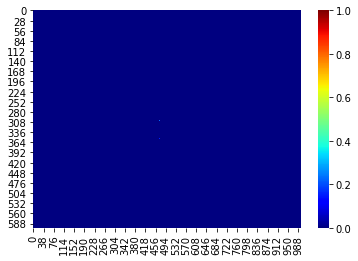

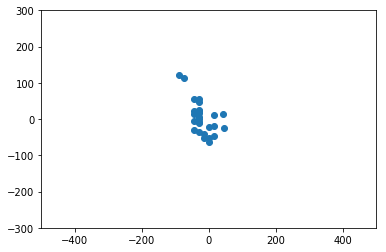

In [55]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('log_data_3.csv')
# filter
data = data[data.Z > -3]
data = data[data.Z < 3]
data = data[data.X > -5]
data = data[data.X < 5]
Frames = list(set(data["Frame"]))
x = np.array(data[data.Frame == 189].loc[:, 'X']*100, dtype='int')
y = np.array(data[data.Frame == 189].loc[:, 'Y']*100, dtype='int')
z = np.array(data[data.Frame == 189].loc[:, 'Z']*100, dtype='int')
Doppler = np.array(data[data.Frame == 189].loc[:, 'Doppler'])
Intensity = np.array(data[data.Frame == 189].loc[:, 'Intensity'])
# 将intensity归一化
amin, amax = Intensity.min(), Intensity.max()
Intensity = (Intensity-amin)/(amax-amin)
matrix_heatmap = np.zeros((600, 1000))
matrix_heatmap[z+300,x+500] = Intensity
plt.figure()
sns.heatmap(matrix_heatmap,cmap='jet')
plt.figure()
plt.scatter(x,z)
plt.xlim(right=500, left=-500)
plt.ylim(top=300, bottom=-300)
plt.show()